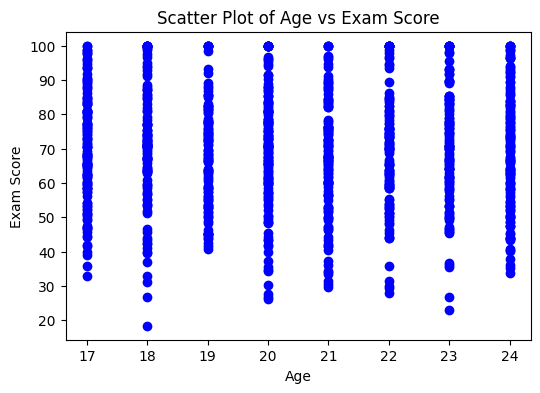

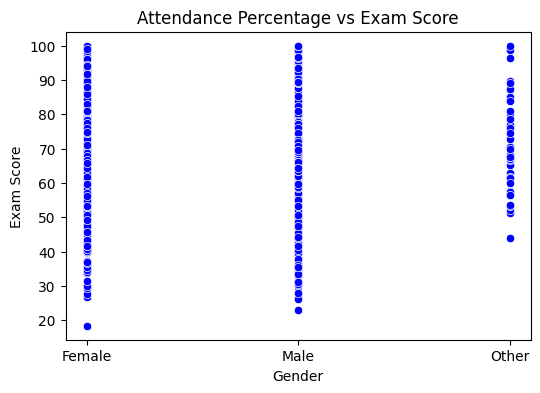

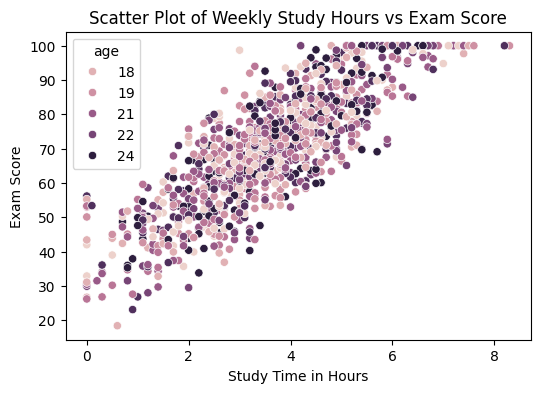

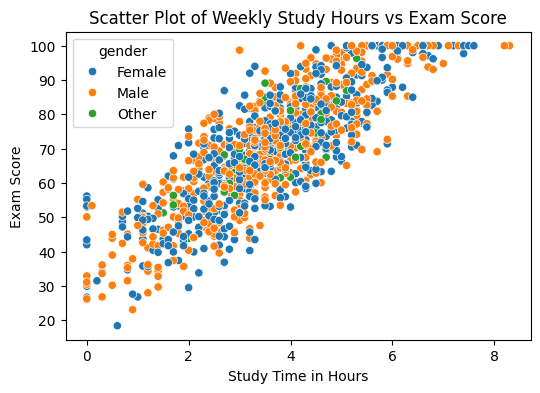

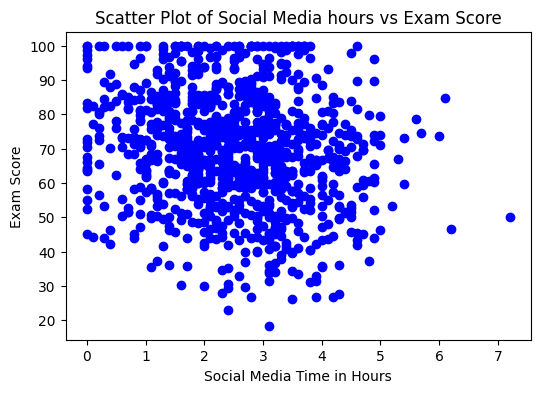

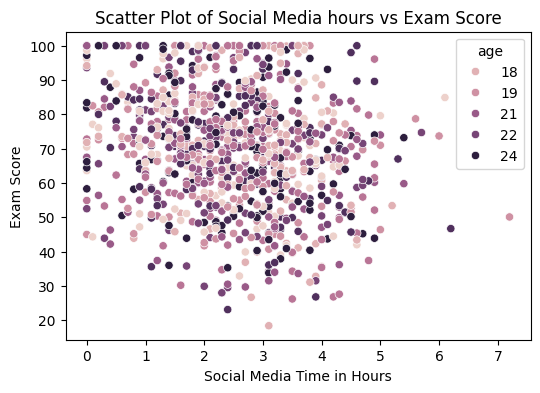

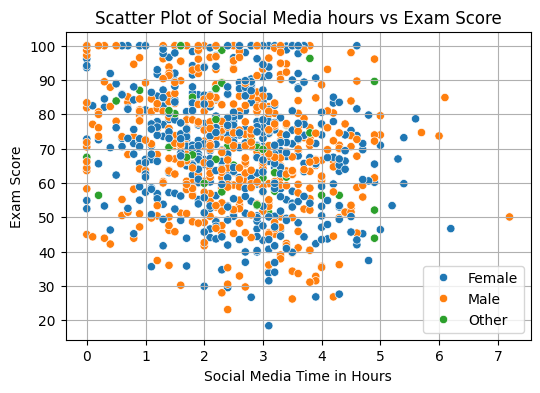

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("student_habits_performance.csv")

# print("First few rows of the dataset:")
# print(df.head())

plt.figure(figsize=(6, 4))
plt.scatter(x='age', y='exam_score', data=df, color='blue')
plt.xlabel('Age')
plt.ylabel('Exam Score')
plt.title('Scatter Plot of Age vs Exam Score')

plt.figure(figsize=(6, 4))
sns.scatterplot(x='gender', y='exam_score', data=df, color='blue')
plt.title('Attendance Percentage vs Exam Score')
plt.xlabel('Gender')
plt.ylabel('Exam Score')


plt.figure(figsize=(6, 4))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, hue='age')
plt.xlabel('Study Time in Hours')
plt.ylabel('Exam Score')
plt.title('Scatter Plot of Weekly Study Hours vs Exam Score')

plt.figure(figsize=(6, 4))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, hue='gender')
plt.xlabel('Study Time in Hours')
plt.ylabel('Exam Score')
plt.title('Scatter Plot of Weekly Study Hours vs Exam Score')

plt.figure(figsize=(6, 4))
plt.scatter(x='social_media_hours', y='exam_score', data=df, color='blue')
plt.xlabel('Social Media Time in Hours')
plt.ylabel('Exam Score')
plt.title('Scatter Plot of Social Media hours vs Exam Score')

plt.figure(figsize=(6, 4))
sns.scatterplot(x='social_media_hours', y='exam_score', data=df, hue='age')
plt.xlabel('Social Media Time in Hours')
plt.ylabel('Exam Score')
plt.title('Scatter Plot of Social Media hours vs Exam Score')

plt.figure(figsize=(6, 4))
sns.scatterplot(x='social_media_hours', y='exam_score', data=df, hue='gender')
plt.xlabel('Social Media Time in Hours')
plt.ylabel('Exam Score')
plt.title('Scatter Plot of Social Media hours vs Exam Score')

plt.legend()
plt.grid(True)
plt.show()

age
20    146
24    134
17    133
21    125
23    119
18    117
19    113
22    113
Name: count, dtype: int64

gender
Female    481
Male      477
Other      42
Name: count, dtype: int64

count    1000.00000
mean        3.55010
std         1.46889
min         0.00000
25%         2.60000
50%         3.50000
75%         4.50000
max         8.30000
Name: study_hours_per_day, dtype: float64

count    1000.000000
mean        2.505500
std         1.172422
min         0.000000
25%         1.700000
50%         2.500000
75%         3.300000
max         7.200000
Name: social_media_hours, dtype: float64


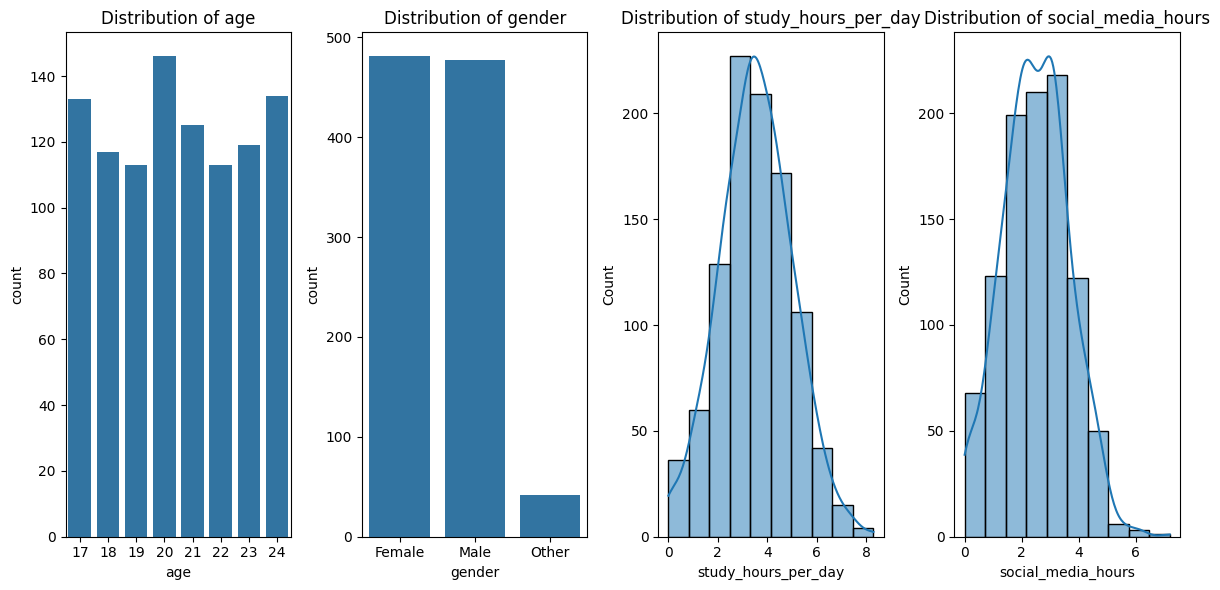

In [2]:
print(df['age'].value_counts())
print()
print(df['gender'].value_counts())
print()
print(df['study_hours_per_day'].describe())
print()
print(df['social_media_hours'].describe())

df['age'] = df['age'].astype('category')
df['gender'] = df['gender'].astype('category')

features_to_plot = ['age', 'gender', 'study_hours_per_day', 'social_media_hours']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 4, i)
    if df[feature].dtype.name == 'category':
        sns.countplot(data=df, x=feature)
    else:
        sns.histplot(df[feature], kde=True, bins=10)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

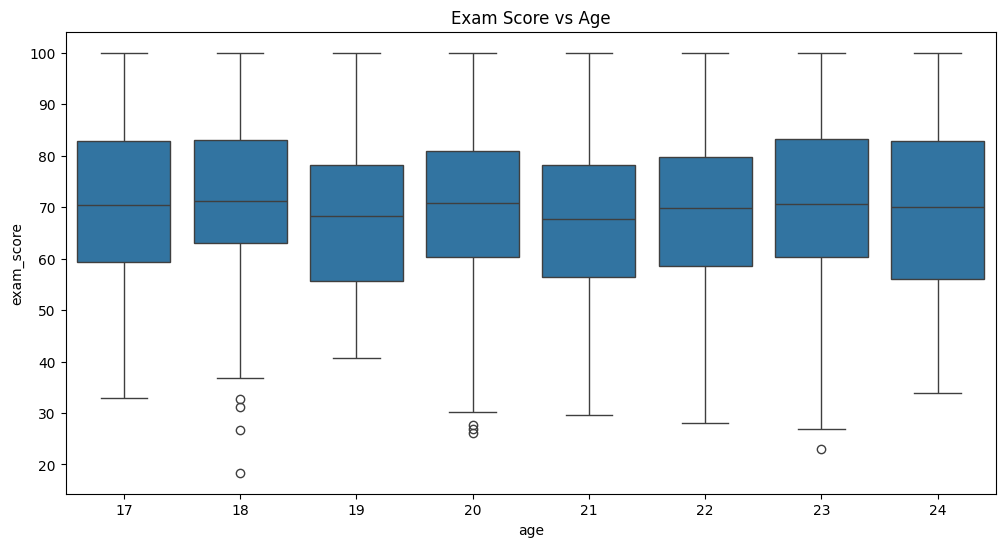

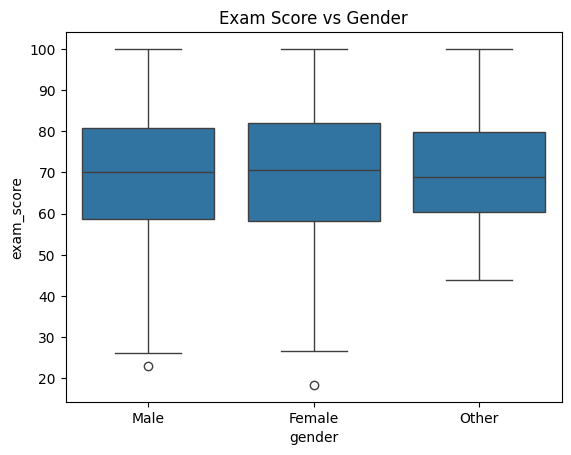

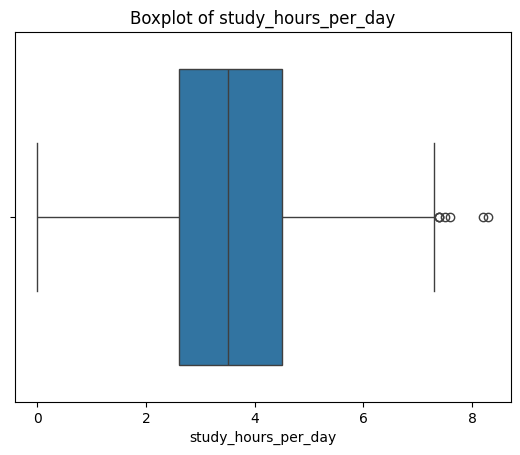

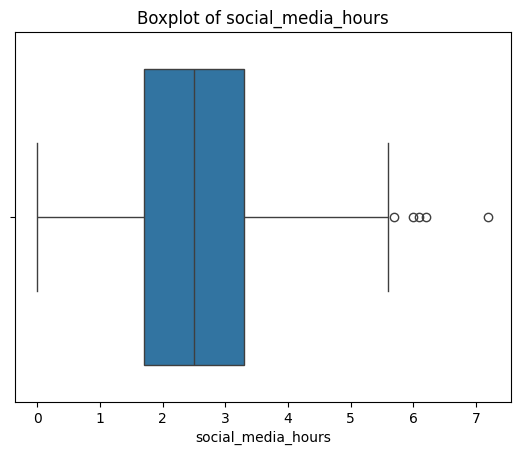

Outliers:
    student_id  study_hours_per_day  exam_score
73       S1073                  7.4        97.7
293      S1293                  7.4       100.0
455      S1455                  8.3       100.0
489      S1489                  7.4       100.0
774      S1774                  7.5       100.0
Outliers:
    student_id  social_media_hours  exam_score
145      S1145                 6.2        46.7
346      S1346                 6.0        73.7
361      S1361                 6.1        84.9
641      S1641                 5.7        74.7
735      S1735                 7.2        50.1


In [3]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='age', y='exam_score')
plt.title('Exam Score vs Age')
plt.show()

sns.boxplot(data=df, x='gender', y='exam_score', order=['Male', 'Female', 'Other'])
plt.title('Exam Score vs Gender')
plt.show()

sns.boxplot(data=df, x='study_hours_per_day')
plt.title('Boxplot of study_hours_per_day')
plt.show()

sns.boxplot(data=df, x='social_media_hours')
plt.title('Boxplot of social_media_hours')
plt.show()

Q1 = df['study_hours_per_day'].quantile(0.25)
Q3 = df['study_hours_per_day'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['study_hours_per_day'] < Q1 - 1.5 * IQR) | (df['study_hours_per_day'] > Q3 + 1.5 * IQR)]
print("Outliers:")
print(outliers[['student_id', 'study_hours_per_day', 'exam_score']].head())

Q1 = df['social_media_hours'].quantile(0.25)
Q3 = df['social_media_hours'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['social_media_hours'] < Q1 - 1.5 * IQR) | (df['social_media_hours'] > Q3 + 1.5 * IQR)]
print("Outliers:")
print(outliers[['student_id', 'social_media_hours', 'exam_score']].head())

In [4]:
from scipy.stats import f_oneway

print(df.groupby('age')['exam_score'].mean())
groups = [group['exam_score'].values for _, group in df.groupby('age')]
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat}, p-value: {p_val}")

print()
print(df.groupby('gender')['exam_score'].mean())
groups = [group['exam_score'].values for _, group in df.groupby('gender')]
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat}, p-value: {p_val}")

print()
print("Correlation Matrix:")
print(df[['study_hours_per_day', 'social_media_hours', 'exam_score']].corr())
print("\n Covariance Matrix:")
print(df[['study_hours_per_day',  'social_media_hours', 'exam_score']].cov())


age
17    70.342857
18    70.939316
19    68.293805
20    69.919863
21    67.544000
22    69.102655
23    70.901681
24    69.638806
Name: exam_score, dtype: float64
F-statistic: 0.6240110675457693, p-value: 0.7363740258697382

gender
Female    69.741372
Male      69.368344
Other     70.647619
Name: exam_score, dtype: float64
F-statistic: 0.1422825683289215, p-value: 0.8673937379445218

Correlation Matrix:
                     study_hours_per_day  social_media_hours  exam_score
study_hours_per_day             1.000000            0.020282    0.825419
social_media_hours              0.020282            1.000000   -0.166733
exam_score                      0.825419           -0.166733    1.000000

 Covariance Matrix:
                     study_hours_per_day  social_media_hours  exam_score
study_hours_per_day             2.157638            0.034929   20.476521
social_media_hours              0.034929            1.374574   -3.301400
exam_score                     20.476521           -3.30140

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11644\1258589443.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('age')['exam_score'].mean())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11644\1258589443.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['exam_score'].values for _, group in df.groupby('age')]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11644\1258589443.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True